# 카드 사용 정보

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_excel("./credit_card_users/default of credit card clients.xls", header=1, sheet_name='Data').iloc[0:,1:]
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## 원본 데이터의 LogisticRegression model 성능

In [5]:
lr = LogisticRegression(n_jobs=-1, random_state=123).fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print('로지스틱 성능: ', accuracy_score(y_test, lr_yhat))

로지스틱 성능:  0.7823333333333333


## PCA 적용한 LogisticRegression model 성능

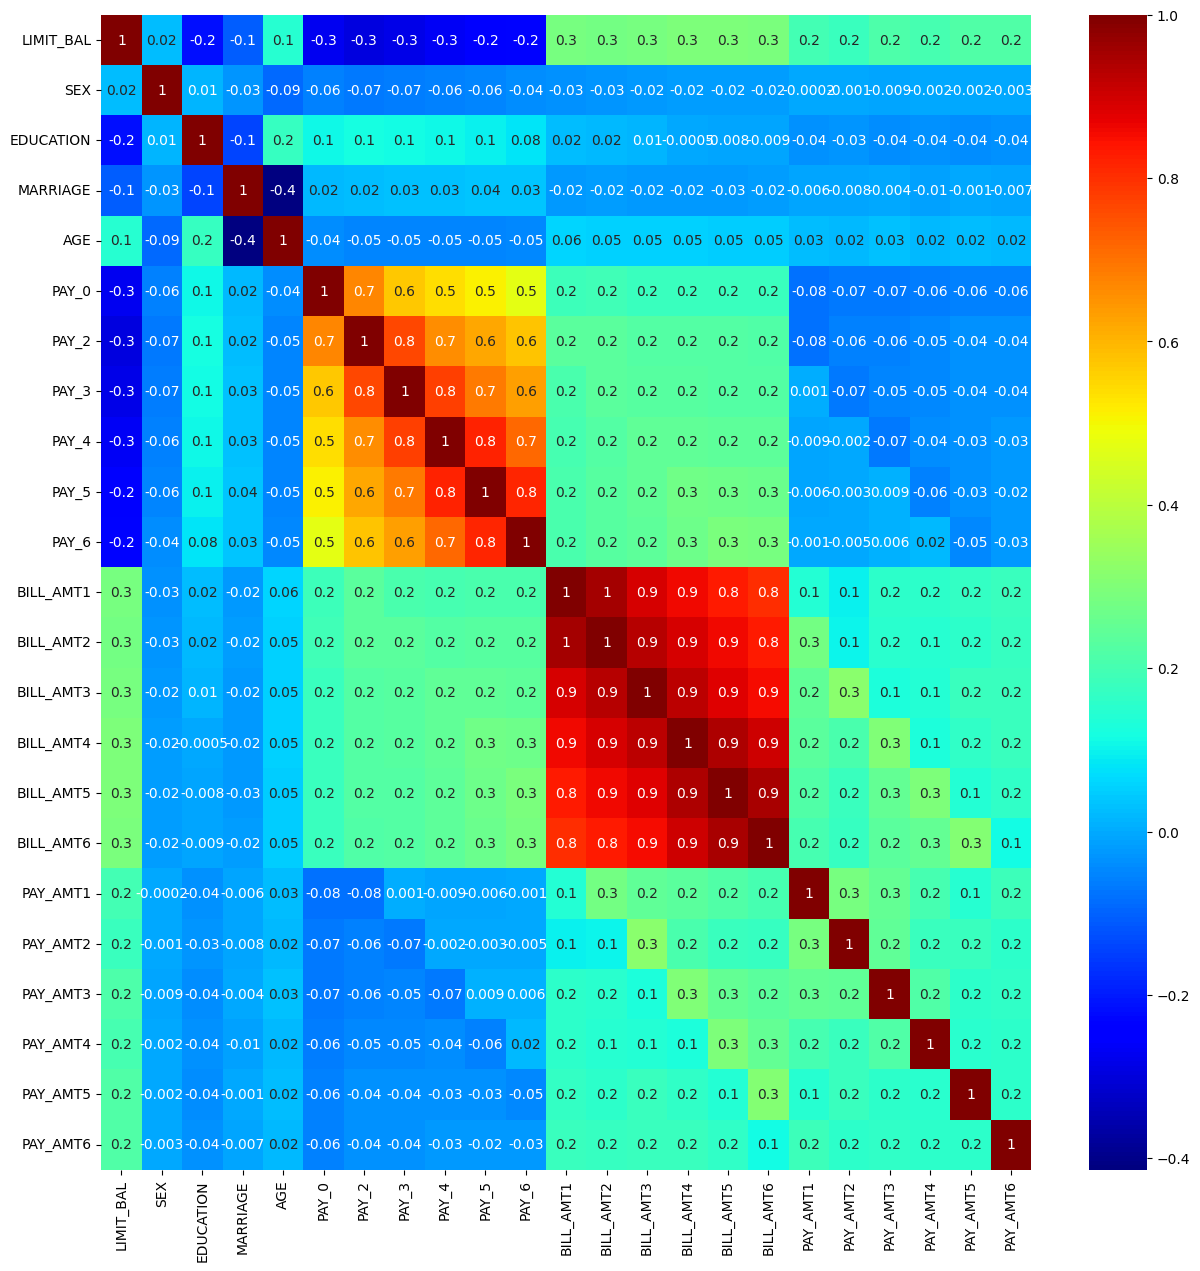

In [6]:
corr_df = X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_df, cmap='jet', annot=True, fmt='.1g')
plt.show()

In [7]:
pca = PCA(n_components=2 , random_state=123)
pca_X = pca.fit_transform(X)
pca_X.shape

(30000, 2)

In [8]:
pca.explained_variance_ratio_

array([0.61043701, 0.29535381])

In [9]:
pca_df = pd.DataFrame(columns=['pca_comp_1', 'pca_comp_2'], data=pca_X)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2, random_state=123)

In [11]:
lr = LogisticRegression(n_jobs=-1, random_state=123).fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print('로지스틱 성능: ', accuracy_score(y_test, lr_yhat))

로지스틱 성능:  0.7826666666666666


### 상관도가 높은 피쳐들만 PCA 적용

In [12]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [13]:
X = X.loc[:,['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
X.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131


In [14]:
pca = PCA(n_components=2, random_state=123)
pca_X = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.9066601  0.05004773]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.2, random_state=123)

In [16]:
lr = LogisticRegression(n_jobs=-1, random_state=123).fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print('로지스틱 성능: ', accuracy_score(y_test, lr_yhat))

로지스틱 성능:  0.7826666666666666
